<a href="https://colab.research.google.com/github/Rafiryd/Rafiryd/blob/rafiryd/skripsi10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/

!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [66]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 1000 )

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.bukalapak.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=1300, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [67]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,99ac25bb-686c-4009-8edd-016279b23fbb,Agroprobiotik Jawa Barat,https://play-lh.googleusercontent.com/a-/AD5-W...,Sy kesulitan ingin komplen masalah pembayaran ...,2,100,5.27.2,2022-12-30 03:49:00,None,NaT
1,c162506f-1395-419e-ae5b-48076e3349a0,Ryan Apriandi,https://play-lh.googleusercontent.com/a-/AD5-W...,"Aplikasi parah, saya belanja dengan CC pilih k...",1,74,5.27.3,2023-01-05 15:39:31,None,NaT
2,798fd05d-c1b8-4bbb-b16a-fb42bb5ac32f,Ranie,https://play-lh.googleusercontent.com/a-/AD5-W...,"Setelah 4thn ga buka akun BL, barusan saya buk...",1,12,5.27.3,2023-01-13 02:11:50,None,NaT
3,dbba0eda-bba0-4526-9957-a8e5fe5b128d,ferry kurniawan,https://play-lh.googleusercontent.com/a-/AD5-W...,Saya sebagai penjual ngerasa kurang nyaman. Ke...,1,17,5.27.3,2023-01-10 03:23:47,None,NaT
4,9e769ec0-5063-4f7c-8fef-ac2f90b95046,Fajron Musayyab,https://play-lh.googleusercontent.com/a-/AD5-W...,"Maaf saya kasih bintang 2, karena untuk layana...",2,1,5.27.3,2023-01-11 23:20:18,None,NaT


In [68]:
len(df_busu.index) #count the number of data we got

1300

In [69]:
df_busu[['userName', 'score','at', 'content']].tail()  #preview userName, rating, date-time, and reviews only

,userName,score,at,content
1295,Pengguna Google,2,2018-12-01 01:51:31,Pengalaman pertama belanja di buka lapak judul...
1296,MonicA yu,1,2020-06-03 13:10:45,Udah di install ulang tetep aja gak kebuka gam...
1297,Fahmi,1,2020-12-28 10:55:19,"Aplikasinya super super berat, kebanyakan ikla..."
1298,Muhammad Ali Mahmudi,5,2020-09-25 01:20:42,Platform terbik penyedia pelatihan Belajar di ...
1299,Pengguna Google,5,2019-02-04 14:15:16,aplikasinya makin mudah dipake. makin friendly...


In [70]:
name_dataframe = df_busu.loc[:,["userName", "score", "at", "content"]]
name_dataframe.rename(columns={"userName": "Nama pengguna", "score":"Rating", "at": "Date", "content": "Ulasan"}, inplace=True)

In [71]:
name_dataframe.tail()

,Nama pengguna,Rating,Date,Ulasan
1295,Pengguna Google,2,2018-12-01 01:51:31,Pengalaman pertama belanja di buka lapak judul...
1296,MonicA yu,1,2020-06-03 13:10:45,Udah di install ulang tetep aja gak kebuka gam...
1297,Fahmi,1,2020-12-28 10:55:19,"Aplikasinya super super berat, kebanyakan ikla..."
1298,Muhammad Ali Mahmudi,5,2020-09-25 01:20:42,Platform terbik penyedia pelatihan Belajar di ...
1299,Pengguna Google,5,2019-02-04 14:15:16,aplikasinya makin mudah dipake. makin friendly...


In [72]:
name_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Nama pengguna  1300 non-null   object        
 1   Rating         1300 non-null   int64         
 2   Date           1300 non-null   datetime64[ns]
 3   Ulasan         1300 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 40.8+ KB


In [73]:
import nltk

In [74]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [75]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].astype(str)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan
0,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,Sy kesulitan ingin komplen masalah pembayaran ...
1,Ryan Apriandi,1,2023-01-05 15:39:31,"Aplikasi parah, saya belanja dengan CC pilih k..."
2,Ranie,1,2023-01-13 02:11:50,"Setelah 4thn ga buka akun BL, barusan saya buk..."
3,ferry kurniawan,1,2023-01-10 03:23:47,Saya sebagai penjual ngerasa kurang nyaman. Ke...
4,Fajron Musayyab,2,2023-01-11 23:20:18,"Maaf saya kasih bintang 2, karena untuk layana..."


In [76]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].str.lower()

In [77]:
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")
                
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_links)

In [78]:
#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_number)

In [79]:
#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_punctuation)

In [80]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_singl_char)

In [81]:
# Tokenisasi 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

name_dataframe['Ulasan_tokenize'] = name_dataframe['Ulasan'].apply(word_tokenize_wrapper)

In [82]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
0,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba..."
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p..."
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa..."
3,ferry kurniawan,1,2023-01-10 03:23:47,saya sebagai penjual ngerasa kurang nyaman ken...,"[saya, sebagai, penjual, ngerasa, kurang, nyam..."
4,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la..."
...,...,...,...,...,...
1295,Pengguna Google,2,2018-12-01 01:51:31,pengalaman pertama belanja di buka lapak judul...,"[pengalaman, pertama, belanja, di, buka, lapak..."
1296,MonicA yu,1,2020-06-03 13:10:45,udah di install ulang tetep aja gak kebuka gam...,"[udah, di, install, ulang, tetep, aja, gak, ke..."
1297,Fahmi,1,2020-12-28 10:55:19,aplikasinya super super berat kebanyakan iklan...,"[aplikasinya, super, super, berat, kebanyakan,..."
1298,Muhammad Ali Mahmudi,5,2020-09-25 01:20:42,platform terbik penyedia pelatihan belajar di ...,"[platform, terbik, penyedia, pelatihan, belaja..."


In [83]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize'], dtype='object')

In [84]:
#Run This Code to Sort the Data By Date 
# tanggal 26-04-2022 sampai 12-10-2022

new_df = name_dataframe[['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize']]
sorted_df = new_df.sort_values(by='Date', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
987,DaLiL DaLiL,5,2023-01-15 13:43:42,bukalapak emang mudah dan gampang di gunakan a...,"[bukalapak, emang, mudah, dan, gampang, di, gu..."
283,Agus Kurniawan,1,2023-01-15 10:29:23,aplikasi bangke paylater udh bayar eeh gak bis...,"[aplikasi, bangke, paylater, udh, bayar, eeh, ..."
1014,Erwin Triatmojo,5,2023-01-15 08:46:45,sangat mudah digunakan mantap gan,"[sangat, mudah, digunakan, mantap, gan]"
598,Bagas HALILINTAR,5,2023-01-15 04:30:52,biaya ongkir sangat mahal padahal sy di suraba...,"[biaya, ongkir, sangat, mahal, padahal, sy, di..."
322,Domiri,1,2023-01-15 02:26:55,aneh daftar akun aja gak bisatombol klik dafta...,"[aneh, daftar, akun, aja, gak, bisatombol, kli..."


In [85]:
sorted_df.dtypes

Nama pengguna              object
Rating                      int64
Date               datetime64[ns]
Ulasan                     object
Ulasan_tokenize            object
dtype: object

In [86]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

Ulasan_fqsist = name_dataframe['Ulasan_tokenize'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(Ulasan_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(ingin, 3), (komplen, 3), (sy, 2), (pembayara...
1    [(di, 3), (saya, 2), (belanja, 2), (cicilan, 2...
2    [(ada, 4), (yg, 4), (bl, 3), (barang, 3), (lbh...
3    [(di, 4), (batal, 3), (saya, 2), (konfirmasi, ...
4    [(tidak, 2), (sesuai, 2), (dan, 2), (maaf, 1),...
Name: Ulasan_tokenize, dtype: object


In [87]:
name_dataframe['Ulasan_tokenize'].unique

<bound method Series.unique of 0       [sy, kesulitan, ingin, komplen, masalah, pemba...
1       [aplikasi, parah, saya, belanja, dengan, cc, p...
2       [setelah, thn, ga, buka, akun, bl, barusan, sa...
3       [saya, sebagai, penjual, ngerasa, kurang, nyam...
4       [maaf, saya, kasih, bintang, karena, untuk, la...
                              ...                        
1295    [pengalaman, pertama, belanja, di, buka, lapak...
1296    [udah, di, install, ulang, tetep, aja, gak, ke...
1297    [aplikasinya, super, super, berat, kebanyakan,...
1298    [platform, terbik, penyedia, pelatihan, belaja...
1299    [aplikasinya, makin, mudah, dipake, makin, fri...
Name: Ulasan_tokenize, Length: 1300, dtype: object>

In [88]:
slank_word_dict = {
    "paraah" : "parah",
    "keduakali" : "",
    "keduakali" : "kedua kali",
    "agak" : "sedikit",
    "pas" : "saat",
    "produkx" : "produknya",
    "sukamkasih" : "suka makasih",
    "gak" : "tidak",
    "cpt" : "cepat",
    "sdh" : "sudah",
    "recommend" : "rekomendasi",
    "bagusseller" : "bagus",
    "bagusssss" : "bagus",
    "bagussssss" : "bagus",
    "baguuussss" : "bagus",
    "cepatmakasih": "cepat",
    "cepatmantappp": "cepat",
    "cepatproduct": "cepat",
    "cepatrecomended": "cepat",
    "cepattoko": "cepat",
    "recomended": "rekomendasi",
    "recommended": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomended": "rekomendasi",
    }

def slank_normalized_term(document):
    return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

In [89]:
normalizad_word = pd.read_csv("/content/kamusindonesia.csv.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [90]:
name_dataframe['Ulasan_normalized'] = name_dataframe['Ulasan_tokenize'].apply(normalized_term).apply(slank_normalized_term)

In [91]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized
0,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem..."
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p..."
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa...","[setelah, tahun, enggak, buka, akun, bl, barus..."
3,ferry kurniawan,1,2023-01-10 03:23:47,saya sebagai penjual ngerasa kurang nyaman ken...,"[saya, sebagai, penjual, ngerasa, kurang, nyam...","[saya, sebagai, penjual, merasa, kurang, nyama..."
4,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, saya, kasih, bintang, karena, untuk, la..."
...,...,...,...,...,...,...
1295,Pengguna Google,2,2018-12-01 01:51:31,pengalaman pertama belanja di buka lapak judul...,"[pengalaman, pertama, belanja, di, buka, lapak...","[pengalaman, pertama, belanja, di, buka, lapak..."
1296,MonicA yu,1,2020-06-03 13:10:45,udah di install ulang tetep aja gak kebuka gam...,"[udah, di, install, ulang, tetep, aja, gak, ke...","[sudah, di, install, ulang, tetap, saja, engga..."
1297,Fahmi,1,2020-12-28 10:55:19,aplikasinya super super berat kebanyakan iklan...,"[aplikasinya, super, super, berat, kebanyakan,...","[aplikasinya, super, super, berat, kebanyakan,..."
1298,Muhammad Ali Mahmudi,5,2020-09-25 01:20:42,platform terbik penyedia pelatihan belajar di ...,"[platform, terbik, penyedia, pelatihan, belaja...","[platform, terbik, penyedia, pelatihan, belaja..."


In [92]:
name_dataframe['Ulasan_normalized'].unique

<bound method Series.unique of 0       [saya, kesulitan, ingin, komplen, masalah, pem...
1       [aplikasi, parah, saya, belanja, dengan, cc, p...
2       [setelah, tahun, enggak, buka, akun, bl, barus...
3       [saya, sebagai, penjual, merasa, kurang, nyama...
4       [maaf, saya, kasih, bintang, karena, untuk, la...
                              ...                        
1295    [pengalaman, pertama, belanja, di, buka, lapak...
1296    [sudah, di, install, ulang, tetap, saja, engga...
1297    [aplikasinya, super, super, berat, kebanyakan,...
1298    [platform, terbik, penyedia, pelatihan, belaja...
1299    [aplikasinya, makin, mudah, dipakai, makin, fr...
Name: Ulasan_normalized, Length: 1300, dtype: object>

In [93]:
from nltk.corpus import stopwords

In [94]:
list_stopwords = stopwords.words('indonesian')

In [95]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

name_dataframe['Ulasan_stop_removed'] = name_dataframe['Ulasan_normalized'].apply(stopwords_removal) 

In [96]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed
0,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,..."
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci..."
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa...","[setelah, tahun, enggak, buka, akun, bl, barus...","[buka, akun, bl, barusan, buka, ceritanya, bar..."
3,ferry kurniawan,1,2023-01-10 03:23:47,saya sebagai penjual ngerasa kurang nyaman ken...,"[saya, sebagai, penjual, ngerasa, kurang, nyam...","[saya, sebagai, penjual, merasa, kurang, nyama...","[penjual, nyaman, konfirmasi, pesanan, terima,..."
4,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, kasih, bintang, layanan, customer, meng..."
...,...,...,...,...,...,...,...
1295,Pengguna Google,2,2018-12-01 01:51:31,pengalaman pertama belanja di buka lapak judul...,"[pengalaman, pertama, belanja, di, buka, lapak...","[pengalaman, pertama, belanja, di, buka, lapak...","[pengalaman, belanja, buka, lapak, judul, desk..."
1296,MonicA yu,1,2020-06-03 13:10:45,udah di install ulang tetep aja gak kebuka gam...,"[udah, di, install, ulang, tetep, aja, gak, ke...","[sudah, di, install, ulang, tetap, saja, engga...","[install, ulang, kebuka, gambarnya, lemot, ban..."
1297,Fahmi,1,2020-12-28 10:55:19,aplikasinya super super berat kebanyakan iklan...,"[aplikasinya, super, super, berat, kebanyakan,...","[aplikasinya, super, super, berat, kebanyakan,...","[aplikasinya, super, super, berat, kebanyakan,..."
1298,Muhammad Ali Mahmudi,5,2020-09-25 01:20:42,platform terbik penyedia pelatihan belajar di ...,"[platform, terbik, penyedia, pelatihan, belaja...","[platform, terbik, penyedia, pelatihan, belaja...","[platform, terbik, penyedia, pelatihan, belaja..."


In [97]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in name_dataframe['Ulasan_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

name_dataframe['Ulasan_Stemmed'] = name_dataframe['Ulasan_stop_removed'].swifter.apply(get_stemmed_term)

4425
------------------------
kesulitan : sulit
komplen : komplen
pembayaran : bayar
paylater : paylater
no : no
watelpon : watelpon
susah : susah
aktif : aktif
membingunkan : membingunkan
masuk : masuk
aplikasi : aplikasi
parah : parah
belanja : belanja
cc : cc
pilih : pilih
klik : klik
cicilan : cicil
tertagih : tagih
full : full
confirmasi : confirmasi
urus : urus
teman : teman
metode : metode
korban : korban
kabar : kabar
bukalapak : bukalapak
buka : buka
akun : akun
bl : bl
barusan : barusan
ceritanya : cerita
barang : barang
dibeli : beli
harapan : harap
dibl : dibl
murah : murah
promo : promo
menarik : tarik
dijual : jual
lengkap : lengkap
sekalinya : sekali
pilihan : pilih
seller : seller
akibatnya : akibat
mahal : mahal
marketplace : marketplace
sebelah : belah
disaat : saat
voucher : voucher
gratis : gratis
ongkir : ongkir
mengasih : asih
diskon : diskon
nya : nya
instan : instan
penjual : jual
nyaman : nyaman
konfirmasi : konfirmasi
pesanan : pesan
terima : terima
batalkan :

Pandas Apply:   0%|          | 0/1300 [00:00<?, ?it/s]

In [100]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed
0,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon..."
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci..."
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa...","[setelah, tahun, enggak, buka, akun, bl, barus...","[buka, akun, bl, barusan, buka, ceritanya, bar...","[buka, akun, bl, barusan, buka, cerita, barang..."
3,ferry kurniawan,1,2023-01-10 03:23:47,saya sebagai penjual ngerasa kurang nyaman ken...,"[saya, sebagai, penjual, ngerasa, kurang, nyam...","[saya, sebagai, penjual, merasa, kurang, nyama...","[penjual, nyaman, konfirmasi, pesanan, terima,...","[jual, nyaman, konfirmasi, pesan, terima, bata..."
4,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, kasih, bintang, layanan, customer, meng...","[maaf, kasih, bintang, layan, customer, aju, p..."
...,...,...,...,...,...,...,...,...
1295,Pengguna Google,2,2018-12-01 01:51:31,pengalaman pertama belanja di buka lapak judul...,"[pengalaman, pertama, belanja, di, buka, lapak...","[pengalaman, pertama, belanja, di, buka, lapak...","[pengalaman, belanja, buka, lapak, judul, desk...","[alam, belanja, buka, lapak, judul, deskripsi,..."
1296,MonicA yu,1,2020-06-03 13:10:45,udah di install ulang tetep aja gak kebuka gam...,"[udah, di, install, ulang, tetep, aja, gak, ke...","[sudah, di, install, ulang, tetap, saja, engga...","[install, ulang, kebuka, gambarnya, lemot, ban...","[install, ulang, buka, gambar, lot, banget, to..."
1297,Fahmi,1,2020-12-28 10:55:19,aplikasinya super super berat kebanyakan iklan...,"[aplikasinya, super, super, berat, kebanyakan,...","[aplikasinya, super, super, berat, kebanyakan,...","[aplikasinya, super, super, berat, kebanyakan,...","[aplikasi, super, super, berat, banyak, iklan,..."
1298,Muhammad Ali Mahmudi,5,2020-09-25 01:20:42,platform terbik penyedia pelatihan belajar di ...,"[platform, terbik, penyedia, pelatihan, belaja...","[platform, terbik, penyedia, pelatihan, belaja...","[platform, terbik, penyedia, pelatihan, belaja...","[platform, bik, sedia, latih, ajar, skill, aka..."


In [101]:
name_dataframe["Ulasan_clean"] = [' '.join(map(str, l)) for l in name_dataframe['Ulasan_Stemmed']]

In [102]:
name_dataframe.to_excel("tokped_text.xlsx")

In [103]:
ulasan = ' '.join(str(v) for v in name_dataframe['Ulasan_clean'])

In [104]:
tokenize_ulasan = word_tokenize(ulasan)

In [105]:
tokenize_ulasan

['sulit',
 'komplen',
 'bayar',
 'paylater',
 'no',
 'watelpon',
 'susah',
 'aktif',
 'membingunkan',
 'komplen',
 'komplen',
 'paylater',
 'bayar',
 'masuk',
 'aplikasi',
 'parah',
 'belanja',
 'cc',
 'pilih',
 'klik',
 'cicil',
 'tagih',
 'full',
 'confirmasi',
 'urus',
 'teman',
 'belanja',
 'metode',
 'cicil',
 'korban',
 'kabar',
 'bukalapak',
 'buka',
 'akun',
 'bl',
 'barusan',
 'buka',
 'cerita',
 'barang',
 'beli',
 'harap',
 'dibl',
 'murah',
 'promo',
 'tarik',
 'bl',
 'tarik',
 'barang',
 'jual',
 'lengkap',
 'sekali',
 'pilih',
 'seller',
 'akibat',
 'barang',
 'jual',
 'mahal',
 'marketplace',
 'belah',
 'saat',
 'voucher',
 'gratis',
 'ongkir',
 'bl',
 'asih',
 'diskon',
 'nya',
 'ongkir',
 'instan',
 'mahal',
 'belah',
 'jual',
 'nyaman',
 'konfirmasi',
 'pesan',
 'terima',
 'batal',
 'mau',
 'beli',
 'batal',
 'batal',
 'batal',
 'otomasi',
 'bukalapak',
 'nya',
 'kerlambatan',
 'kirim',
 'lakh',
 'feedback',
 'negatif',
 'salah',
 'toko',
 'bel',
 'plin',
 'plan',
 'p

In [106]:
fqdist = FreqDist(tokenize_ulasan)

In [107]:
fqdist

FreqDist({'bukalapak': 585, 'aplikasi': 439, 'nya': 408, 'barang': 385, 'bayar': 280, 'buka': 250, 'pakai': 249, 'beli': 246, 'kirim': 225, 'belanja': 221, ...})

In [108]:
# mencetak 15 kata paling banyak digunakan
fqdist.most_common(15)

[('bukalapak', 585),
 ('aplikasi', 439),
 ('nya', 408),
 ('barang', 385),
 ('bayar', 280),
 ('buka', 250),
 ('pakai', 249),
 ('beli', 246),
 ('kirim', 225),
 ('belanja', 221),
 ('jual', 205),
 ('lapak', 189),
 ('transaksi', 180),
 ('bantu', 178),
 ('chat', 160)]

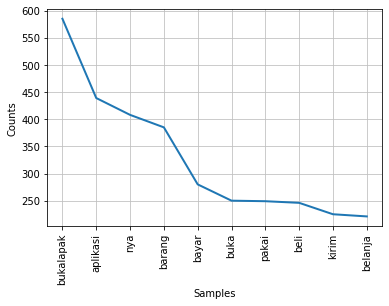

In [109]:
import matplotlib.pyplot as plt

# plotting
fqdist.plot(10,cumulative=False)
plt.show()

In [110]:
label = []
for index, row in name_dataframe.iterrows():
    if row["Rating"] == 5 or row["Rating"] == 4:
        label.append(1)
    else:
        label.append(0)

name_dataframe["label"] = label

name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon...",sulit komplen bayar paylater no watelpon susah...,0
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa...","[setelah, tahun, enggak, buka, akun, bl, barus...","[buka, akun, bl, barusan, buka, ceritanya, bar...","[buka, akun, bl, barusan, buka, cerita, barang...",buka akun bl barusan buka cerita barang beli h...,0
3,ferry kurniawan,1,2023-01-10 03:23:47,saya sebagai penjual ngerasa kurang nyaman ken...,"[saya, sebagai, penjual, ngerasa, kurang, nyam...","[saya, sebagai, penjual, merasa, kurang, nyama...","[penjual, nyaman, konfirmasi, pesanan, terima,...","[jual, nyaman, konfirmasi, pesan, terima, bata...",jual nyaman konfirmasi pesan terima batal mau ...,0
4,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, kasih, bintang, layanan, customer, meng...","[maaf, kasih, bintang, layan, customer, aju, p...",maaf kasih bintang layan customer aju pesan cu...,0
...,...,...,...,...,...,...,...,...,...,...
1295,Pengguna Google,2,2018-12-01 01:51:31,pengalaman pertama belanja di buka lapak judul...,"[pengalaman, pertama, belanja, di, buka, lapak...","[pengalaman, pertama, belanja, di, buka, lapak...","[pengalaman, belanja, buka, lapak, judul, desk...","[alam, belanja, buka, lapak, judul, deskripsi,...",alam belanja buka lapak judul deskripsi beda j...,0
1296,MonicA yu,1,2020-06-03 13:10:45,udah di install ulang tetep aja gak kebuka gam...,"[udah, di, install, ulang, tetep, aja, gak, ke...","[sudah, di, install, ulang, tetap, saja, engga...","[install, ulang, kebuka, gambarnya, lemot, ban...","[install, ulang, buka, gambar, lot, banget, to...",install ulang buka gambar lot banget tolong ba...,0
1297,Fahmi,1,2020-12-28 10:55:19,aplikasinya super super berat kebanyakan iklan...,"[aplikasinya, super, super, berat, kebanyakan,...","[aplikasinya, super, super, berat, kebanyakan,...","[aplikasinya, super, super, berat, kebanyakan,...","[aplikasi, super, super, berat, banyak, iklan,...",aplikasi super super berat banyak iklan pajang...,0
1298,Muhammad Ali Mahmudi,5,2020-09-25 01:20:42,platform terbik penyedia pelatihan belajar di ...,"[platform, terbik, penyedia, pelatihan, belaja...","[platform, terbik, penyedia, pelatihan, belaja...","[platform, terbik, penyedia, pelatihan, belaja...","[platform, bik, sedia, latih, ajar, skill, aka...",platform bik sedia latih ajar skill akademi me...,1


In [126]:
#create a user define function to find out polarity & subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#creating another user define function to label the sentiment 

def getSentiment(value):
    if value<0:
        return 'Negative'
    elif value==0:
        return 'Neutral'
    else:
        return 'Positive'

In [127]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment
0,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon...",sulit komplen bayar paylater no watelpon susah...,0,0.00,0.00,Neutral
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0,0.35,0.55,Positive
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa...","[setelah, tahun, enggak, buka, akun, bl, barus...","[buka, akun, bl, barusan, buka, ceritanya, bar...","[buka, akun, bl, barusan, buka, cerita, barang...",buka akun bl barusan buka cerita barang beli h...,0,0.00,0.00,Neutral
3,ferry kurniawan,1,2023-01-10 03:23:47,saya sebagai penjual ngerasa kurang nyaman ken...,"[saya, sebagai, penjual, ngerasa, kurang, nyam...","[saya, sebagai, penjual, merasa, kurang, nyama...","[penjual, nyaman, konfirmasi, pesanan, terima,...","[jual, nyaman, konfirmasi, pesan, terima, bata...",jual nyaman konfirmasi pesan terima batal mau ...,0,0.00,0.00,Neutral
4,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, kasih, bintang, layanan, customer, meng...","[maaf, kasih, bintang, layan, customer, aju, p...",maaf kasih bintang layan customer aju pesan cu...,0,0.00,0.00,Neutral


In [113]:
from textblob import TextBlob


In [121]:
def run_vader(name_dataframe):
    # Generate VADER sentiment analyzer object
    sid = SentimentIntensityAnalyzer()

In [122]:
name_dataframe['Polarity']=name_dataframe['Ulasan_clean'].apply(getPolarity)
name_dataframe['Subjectivity']=name_dataframe['Ulasan_clean'].apply(getSubjectivity)
name_dataframe['Sentiment']=name_dataframe['Polarity'].apply(getSentiment)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment
0,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon...",sulit komplen bayar paylater no watelpon susah...,0,0.00,0.00,Neutral
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0,0.35,0.55,Positive
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa...","[setelah, tahun, enggak, buka, akun, bl, barus...","[buka, akun, bl, barusan, buka, ceritanya, bar...","[buka, akun, bl, barusan, buka, cerita, barang...",buka akun bl barusan buka cerita barang beli h...,0,0.00,0.00,Neutral
3,ferry kurniawan,1,2023-01-10 03:23:47,saya sebagai penjual ngerasa kurang nyaman ken...,"[saya, sebagai, penjual, ngerasa, kurang, nyam...","[saya, sebagai, penjual, merasa, kurang, nyama...","[penjual, nyaman, konfirmasi, pesanan, terima,...","[jual, nyaman, konfirmasi, pesan, terima, bata...",jual nyaman konfirmasi pesan terima batal mau ...,0,0.00,0.00,Neutral
4,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, kasih, bintang, layanan, customer, meng...","[maaf, kasih, bintang, layan, customer, aju, p...",maaf kasih bintang layan customer aju pesan cu...,0,0.00,0.00,Neutral


In [115]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment
0,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon...",sulit komplen bayar paylater no watelpon susah...,0,0.000000,0.000000,Neutral
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0,0.350000,0.550000,Positive
2,Ranie,1,2023-01-13 02:11:50,setelah thn ga buka akun bl barusan saya buka...,"[setelah, thn, ga, buka, akun, bl, barusan, sa...","[setelah, tahun, enggak, buka, akun, bl, barus...","[buka, akun, bl, barusan, buka, ceritanya, bar...","[buka, akun, bl, barusan, buka, cerita, barang...",buka akun bl barusan buka cerita barang beli h...,0,0.000000,0.000000,Neutral
3,ferry kurniawan,1,2023-01-10 03:23:47,saya sebagai penjual ngerasa kurang nyaman ken...,"[saya, sebagai, penjual, ngerasa, kurang, nyam...","[saya, sebagai, penjual, merasa, kurang, nyama...","[penjual, nyaman, konfirmasi, pesanan, terima,...","[jual, nyaman, konfirmasi, pesan, terima, bata...",jual nyaman konfirmasi pesan terima batal mau ...,0,0.000000,0.000000,Neutral
4,Fajron Musayyab,2,2023-01-11 23:20:18,maaf saya kasih bintang karena untuk layanan...,"[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, saya, kasih, bintang, karena, untuk, la...","[maaf, kasih, bintang, layanan, customer, meng...","[maaf, kasih, bintang, layan, customer, aju, p...",maaf kasih bintang layan customer aju pesan cu...,0,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Pengguna Google,2,2018-12-01 01:51:31,pengalaman pertama belanja di buka lapak judul...,"[pengalaman, pertama, belanja, di, buka, lapak...","[pengalaman, pertama, belanja, di, buka, lapak...","[pengalaman, belanja, buka, lapak, judul, desk...","[alam, belanja, buka, lapak, judul, deskripsi,...",alam belanja buka lapak judul deskripsi beda j...,0,0.000000,0.000000,Neutral
1296,MonicA yu,1,2020-06-03 13:10:45,udah di install ulang tetep aja gak kebuka gam...,"[udah, di, install, ulang, tetep, aja, gak, ke...","[sudah, di, install, ulang, tetap, saja, engga...","[install, ulang, kebuka, gambarnya, lemot, ban...","[install, ulang, buka, gambar, lot, banget, to...",install ulang buka gambar lot banget tolong ba...,0,0.000000,0.000000,Neutral
1297,Fahmi,1,2020-12-28 10:55:19,aplikasinya super super berat kebanyakan iklan...,"[aplikasinya, super, super, berat, kebanyakan,...","[aplikasinya, super, super, berat, kebanyakan,...","[aplikasinya, super, super, berat, kebanyakan,...","[aplikasi, super, super, berat, banyak, iklan,...",aplikasi super super berat banyak iklan pajang...,0,0.333333,0.666667,Positive
1298,Muhammad Ali Mahmudi,5,2020-09-25 01:20:42,platform terbik penyedia pelatihan belajar di ...,"[platform, terbik, penyedia, pelatihan, belaja...","[platform, terbik, penyedia, pelatihan, belaja...","[platform, terbik, penyedia, pelatihan, belaja...","[platform, bik, sedia, latih, ajar, skill, aka...",platform bik sedia latih ajar skill akademi me...,1,0.000000,0.000000,Neutral


Positive words


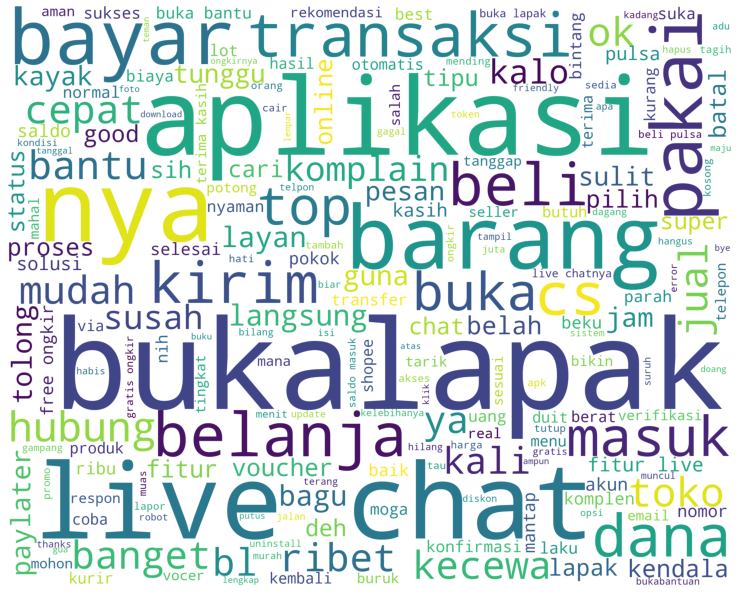

Negative words


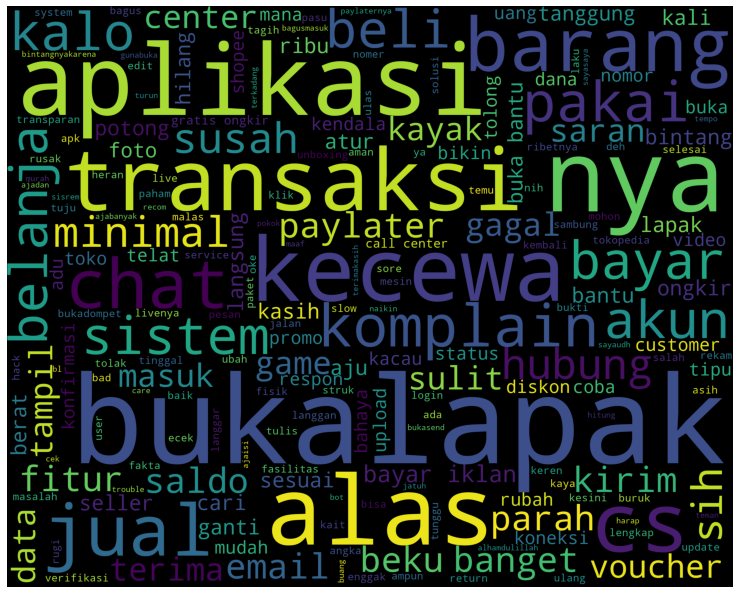

Neutral words


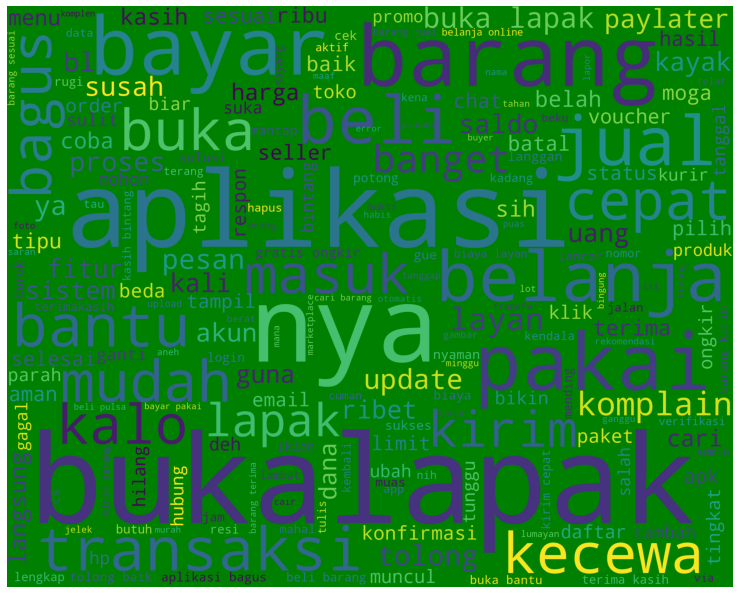

In [123]:
train_pos = name_dataframe[ name_dataframe['Sentiment'] == 'Positive']
train_pos = train_pos['Ulasan_clean']
train_neg = name_dataframe[ name_dataframe['Sentiment'] == 'Negative']
train_neg = train_neg['Ulasan_clean']
train_net = name_dataframe[ name_dataframe['Sentiment'] == 'Neutral']
train_net = train_net['Ulasan_clean']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)
print("Neutral words")
wordcloud_draw(train_net,'green')

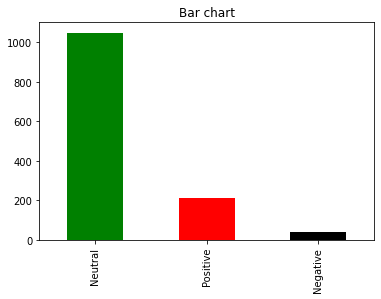

In [128]:
sentimen_data=pd.value_counts(name_dataframe["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red", "black"])
plt.title('Bar chart')
plt.show()

In [117]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
name_dataframe["Sentiment"].value_counts()

Neutral     1048
Positive     210
Negative      42
Name: Sentiment, dtype: int64

In [130]:
name_dataframe["Sentiment"].value_counts()

Neutral     1048
Positive     210
Negative      42
Name: Sentiment, dtype: int64

In [131]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [132]:
Ulasan = name_dataframe['Ulasan_clean']

In [133]:
Ulasan.isnull().sum()

0

In [134]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

3510


In [135]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata 

{'sulit': 3066,
 'komplen': 1565,
 'bayar': 307,
 'paylater': 2342,
 'no': 2138,
 'watelpon': 3466,
 'susah': 3082,
 'aktif': 76,
 'membingunkan': 1929,
 'masuk': 1896,
 'aplikasi': 161,
 'parah': 2311,
 'belanja': 337,
 'cc': 618,
 'pilih': 2468,
 'klik': 1537,
 'cicil': 658,
 'tagih': 3106,
 'full': 1050,
 'confirmasi': 675,
 'urus': 3396,
 'teman': 3165,
 'metode': 1984,
 'korban': 1597,
 'kabar': 1385,
 'bukalapak': 521,
 'buka': 513,
 'akun': 86,
 'bl': 442,
 'barusan': 292,
 'cerita': 640,
 'barang': 274,
 'beli': 340,
 'harap': 1163,
 'dibl': 789,
 'murah': 2046,
 'promo': 2559,
 'tarik': 3139,
 'jual': 1371,
 'lengkap': 1746,
 'sekali': 2840,
 'seller': 2864,
 'akibat': 71,
 'mahal': 1826,
 'marketplace': 1880,
 'belah': 335,
 'saat': 2732,
 'voucher': 3442,
 'gratis': 1117,
 'ongkir': 2231,
 'asih': 190,
 'diskon': 845,
 'nya': 2169,
 'instan': 1276,
 'nyaman': 2185,
 'konfirmasi': 1578,
 'pesan': 2453,
 'terima': 3185,
 'batal': 294,
 'mau': 1907,
 'otomasi': 2266,
 'kerlamba

In [136]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 76)	1
  (0, 307)	2
  (0, 1565)	3
  (0, 1896)	1
  (0, 1929)	1
  (0, 2138)	1
  (0, 2342)	2
  (0, 3066)	1
  (0, 3082)	1
  (0, 3466)	1
  (1, 161)	1
  (1, 337)	2
  (1, 521)	1
  (1, 618)	1
  (1, 658)	2
  (1, 675)	1
  (1, 1050)	1
  (1, 1385)	1
  (1, 1537)	1
  (1, 1597)	1
  (1, 1984)	1
  (1, 2311)	1
  (1, 2468)	1
  (1, 3106)	1
  (1, 3165)	1
  :	:
  (1299, 1413)	1
  (1299, 1484)	1
  (1299, 1487)	1
  (1299, 1534)	1
  (1299, 1644)	1
  (1299, 1921)	1
  (1299, 1999)	1
  (1299, 2033)	2
  (1299, 2084)	1
  (1299, 2156)	1
  (1299, 2231)	1
  (1299, 2297)	2
  (1299, 2483)	2
  (1299, 2555)	1
  (1299, 2565)	1
  (1299, 2905)	2
  (1299, 2914)	1
  (1299, 3061)	1
  (1299, 3152)	1
  (1299, 3328)	1
  (1299, 3342)	1
  (1299, 3348)	1
  (1299, 3442)	2
  (1299, 3465)	1
  (1299, 3492)	1


In [137]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

aplikasi parah belanja cc pilih klik cicil tagih full confirmasi urus teman belanja metode cicil korban kabar bukalapak


In [138]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 161)	1
  (0, 337)	2
  (0, 521)	1
  (0, 618)	1
  (0, 658)	2
  (0, 675)	1
  (0, 1050)	1
  (0, 1385)	1
  (0, 1537)	1
  (0, 1597)	1
  (0, 1984)	1
  (0, 2311)	1
  (0, 2468)	1
  (0, 3106)	1
  (0, 3165)	1
  (0, 3396)	1


In [139]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[7.4777413  7.07227619 7.4777413  ... 7.4777413  7.4777413  7.4777413 ]
  (0, 3396)	0.236806053607085
  (0, 3165)	0.2192910624471449
  (0, 3106)	0.17044682087768542
  (0, 2468)	0.17300523607295887
  (0, 2311)	0.16882856856509582
  (0, 1984)	0.21399765413975003
  (0, 1597)	0.2601069025970881
  (0, 1537)	0.17970770530096297
  (0, 1385)	0.2964302036333482
  (0, 1050)	0.26895268713548215
  (0, 675)	0.2964302036333482
  (0, 658)	0.5202138051941761
  (0, 618)	0.26895268713548215
  (0, 521)	0.08436762239334944
  (0, 337)	0.2361004061544535
  (0, 161)	0.09330767969148214


In [140]:
data_label = name_dataframe[["Nama pengguna", "Ulasan_clean", "Sentiment"]]

In [141]:
data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-141-5732072d6cca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")


In [142]:
data_label.to_excel("data_label.xlsx")

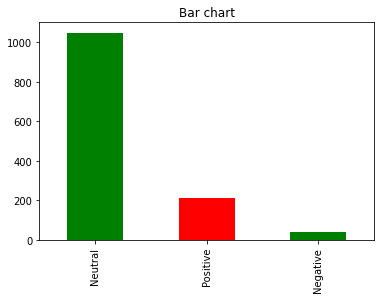

In [144]:
sentimen_data=pd.value_counts(data_label["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red"])
plt.title('Bar chart')
plt.show()

In [145]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'Ulasan_normalized', 'Ulasan_stop_removed', 'Ulasan_Stemmed',
       'Ulasan_clean', 'label', 'Polarity', 'Subjectivity', 'Sentiment'],
      dtype='object')

In [146]:
from wordcloud import WordCloud

In [147]:
train_s0 = data_label[data_label["Sentiment"] == 'Negative']

In [148]:
train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-148-4a391e85ccb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")


In [149]:
train_s0

,Nama pengguna,Ulasan_clean,Sentiment
18,Ahmad Amek,maaf turun bintangnyakarena pakai bukalapak pa...,Negative
19,Ulfa Mar'atus Solihah,edit ulas hubung customer care aplikasi kait b...,Negative
39,Bam Hendrian,kesini sistem nya berat ajabanyak sisrem gunab...,Negative
40,Novi Nurhalimah,kecewa aplikasi bukalapak telat bayar jatuh te...,Negative
63,Tegar Ibnu,sih asih voucher gratis ongkir minimal potong ...,Negative
75,Hambali,rekan saran belanja bukalapak bayak tipu salah...,Negative
92,WesLi,susah hubungin cs sulit hubung cs pakai email ...,Negative
104,official store,aplikasi sungguh kecewa konsisten terap atur s...,Negative
107,Helmi Arianto,jual barang bukalapak sabtu sore transaksi bar...,Negative
115,Richo Agustian,halo bukalapak email ganti alas gagal kirim em...,Negative


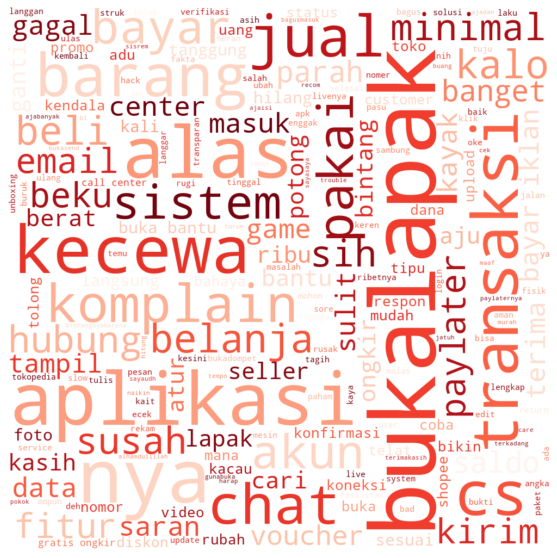

In [150]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan_clean"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [152]:
train_s1 = data_label[data_label["Sentiment"] == 'Positive']

In [153]:
train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-153-89653e0cae75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")


In [154]:
train_s1

,Nama pengguna,Ulasan_clean,Sentiment
1,Ryan Apriandi,aplikasi parah belanja cc pilih klik cicil tag...,Positive
6,rizky adhi,fitur live chat tipu kontak cs hubung konsumen...,Positive
8,AKANG SYAHRUDIN,belanja bl free ongkir berbelitbelit kes trik ...,Positive
10,Hadi Yanto,aplikasi rekomendasi banget deh pokok puas sen...,Positive
11,Animah Astuti,kali bintang sih csnya ramah layan langgan kai...,Positive
...,...,...,...
1282,kartika dewi,aplikasi kecewa suami kena hack belanja bukala...,Positive
1289,Star Online,mantap suka ok kecewa vocer ya vocer gratis on...,Positive
1291,Pengguna Google,bukalapak aplikasi ecommerce download belanja ...,Positive
1297,Fahmi,aplikasi super super berat banyak iklan pajang...,Positive


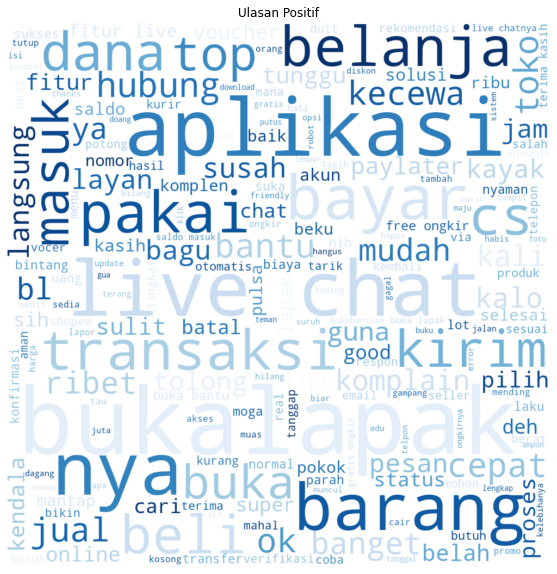

In [155]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan_clean"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

In [156]:
data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")

<ipython-input-156-27b828896519>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")


In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_clean'], data_label['Sentiment'], 
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

In [159]:
import numpy as np

In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [161]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1170, 3236)
(130, 3236)


In [162]:
X_train = X_train.toarray()

In [163]:
X_test = X_test.toarray()

In [164]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [165]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#deklarasi metode cross validation
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
#tuning hyperparameter menggunakan gridsearch

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gscv_nb = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 

#Fitting ke Model
gscv_nb.fit(X_train,y_train)
#mendapatkan hyperparameters terbaik
gscv_nb.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 0.0008111308307896872}

In [166]:
nb = GaussianNB(var_smoothing=1.0)

In [167]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=1.0)

In [168]:
y_pred_nb = nb.predict(X_test)

In [169]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [170]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred_nb))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred_nb))

--------------------- confusion matrix  ----------------------------
[[ 2  1  1]
 [33 56 16]
 [ 8  0 13]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

    Negative       0.05      0.50      0.09         4
     Neutral       0.98      0.53      0.69       105
    Positive       0.43      0.62      0.51        21

    accuracy                           0.55       130
   macro avg       0.49      0.55      0.43       130
weighted avg       0.86      0.55      0.64       130



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Regresi Logistik
logreg = LogisticRegression()
# SVM
svm = SVC(probability=True)

In [ ]:
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)


In [ ]:
y_pred1_logreg = logreg.predict(X_test)
y_pred1_svm = svm.predict(X_test)

In [ ]:
print('---------------  Regresi Logistik  -------------------')
print(classification_report(y_test, y_pred1_logreg))
print('--------------------- SVM ----------------------------')
print(classification_report(y_test, y_pred1_svm))